In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,PostId,PostCreationDate,OwnerUserId,OwnerCreationDate,ReputationAtPostCreation,OwnerUndeletedAnswerCountAtPostTime,Title,BodyMarkdown,Tag1,Tag2,Tag3,Tag4,Tag5,PostClosedDate,OpenStatus
0,4,07/31/2008 21:42:52,8,07/31/2008 21:33:24,1,0,Decimal vs Double?,"I'm new to C#, and I want to use a trackbar fo...",c#,NaN,NaN,NaN,NaN,NaN,open
1,6,07/31/2008 22:08:08,9,07/31/2008 21:35:26,1,0,Percentage width child in absolutely positione...,I've got an absolutely positioned div containi...,html,css,NaN,NaN,NaN,NaN,open
2,8,07/31/2008 23:33:19,9,07/31/2008 21:35:26,16,1,Tools for porting J# code to C#,Are there any conversion tools for porting Vis...,j#,NaN,NaN,NaN,NaN,NaN,open
3,9,07/31/2008 23:40:59,1,07/31/2008 14:22:31,1,1,How do I calculate someone's age in c#?,"Given a DateTime representing their birthday, ...",c#,NaN,NaN,NaN,NaN,NaN,open
4,9610539,03/07/2012 23:07:09,1021610,10/31/2011 08:26:49,29,0,retrieve data from NSUserDefaults to TableView,I save values of two labels through NSUserDefa...,iphone,objective-c,ios5,NaN,NaN,NaN,open


In [3]:
df.OpenStatus.value_counts()

open                   3300392
not a real question      30789
off topic                17530
not constructive         15659
too localized             6158
Name: OpenStatus, dtype: int64

In [4]:
df.PostClosedDate.value_counts()

06/13/2012 13:31:12    2
06/13/2012 07:13:34    2
07/16/2012 02:40:12    2
02/23/2012 19:15:55    2
11/09/2011 12:34:16    2
                      ..
07/05/2012 14:36:10    1
03/29/2011 16:03:21    1
06/07/2012 07:56:57    1
07/14/2012 12:04:38    1
05/22/2012 19:20:40    1
Name: PostClosedDate, Length: 70070, dtype: int64

In [5]:
df.Tag1.value_counts()

c#                   282313
java                 240920
php                  228350
javascript           186336
android              174536
                      ...  
phpcassa                  1
argparse                  1
technology-choice         1
livecd                    1
ticker                    1
Name: Tag1, Length: 20059, dtype: int64

In [6]:
df.OwnerUserId.value_counts()

39677      1774
4653       1427
34537      1383
179736     1239
149080     1195
           ... 
1199377       1
789890        1
804235        1
812431        1
987676        1
Name: OwnerUserId, Length: 622689, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3370528 entries, 0 to 3370527
Data columns (total 15 columns):
 #   Column                               Dtype 
---  ------                               ----- 
 0   PostId                               int64 
 1   PostCreationDate                     object
 2   OwnerUserId                          int64 
 3   OwnerCreationDate                    object
 4   ReputationAtPostCreation             int64 
 5   OwnerUndeletedAnswerCountAtPostTime  int64 
 6   Title                                object
 7   BodyMarkdown                         object
 8   Tag1                                 object
 9   Tag2                                 object
 10  Tag3                                 object
 11  Tag4                                 object
 12  Tag5                                 object
 13  PostClosedDate                       object
 14  OpenStatus                           object
dtypes: int64(4), object(11)
memory usage: 385.7+ MB


### Take a small subset of the data 

In [8]:
10000/3370528

0.0029668942076731004

In [9]:
Xdata = df[["Title", "BodyMarkdown"]]
ydata = df["OpenStatus"]

In [10]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split( Xdata, ydata, test_size=0.003, 
                                                    random_state=42, stratify=ydata)

In [13]:
y_test.value_counts()

open                   9902
not a real question      92
off topic                53
not constructive         47
too localized            18
Name: OpenStatus, dtype: int64

In [14]:
X_test.head()

,Title,BodyMarkdown
1294178,Adding an external link in entity views in CRM...,"In CRM 4.0, I would like (if possible) to open..."
1568857,books for numerical calcualtions in C++,> I tried to find a book. I need a good\r\n> ...
580826,Disable WinForms ProgressBar animation,Is there a possbility to disable animation of ...
779543,Excel Macro: error when pasting - moving down ...,I'm attempting to copy data from three workboo...
2712849,You must finish editing the current row gridvi...,I am new to the wonderful world of asp.net gri...


### Stop words, stemming, lemmatization

In [15]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [16]:
lemmatizer = nlp.Defaults.create_lemmatizer()

In [17]:
word_list = ['feet', 'foot', 'foots', 'footing']

In [18]:
[lemmatizer.lookup(word) for word in word_list]

['feet', 'foot', 'foots', 'footing']

### Data processing

In [49]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import re, string

In [50]:
import nltk
#nltk.download('punkt')

In [121]:
punctuation = list(string.punctuation)

my_stopwords = nltk.corpus.stopwords.words('english')+ punctuation

re_tok = re.compile(f'([{string.punctuation}“”¨«»®´·º½¾¿¡§£₤‘’])')

def remove_links(tweet):
    '''Takes a string and removes web links from it'''
    tweet = re.sub(r'http\S+', '', tweet) # remove http links
    tweet = re.sub(r'bit.ly/\S+', '', tweet) # rempve bitly links
    tweet = tweet.strip('[link]') # remove [links]
    return tweet

def tokenize(s):
    output = re.sub(r'\d+', '', s) # remove numbers 
    output = remove_links(output)
    result = re_tok.sub(r' \1 ', output).split() 
    result = [word for word in result if len(word)>2]
    result = [word for word in result if word not in my_stopwords]
    return result

In [122]:
vectorizer = CountVectorizer(tokenizer = tokenize)

In [123]:
vectors = vectorizer.fit_transform(X_test.BodyMarkdown).todense() # (documents, vocab)
vectors.shape

(10112, 47100)

In [124]:
X_test.shape

(10112, 2)

In [125]:
vocab = np.array(vectorizer.get_feature_names())
vocab.shape

(47100,)

In [127]:
print(vocab[47000:47010])

['zst' 'zstart' 'zstring' 'zte' 'zts' 'zufallszahl' 'zult' 'zune'
 'zurueck' 'zus']


In [128]:
m, n = X_test.shape
d=5

In [129]:
from sklearn.decomposition import NMF

In [130]:
clf = NMF(n_components=d, random_state=1)

%time W1 = clf.fit_transform(vectors)
H1 = clf.components_

CPU times: user 1min 48s, sys: 11.2 s, total: 1min 59s
Wall time: 1min 13s


In [105]:
H1.shape

(5, 49709)

In [106]:
n_top_words = 20
vec_feature_names = vectorizer.get_feature_names()

In [132]:
import matplotlib.pyplot as plt

def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(1, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()


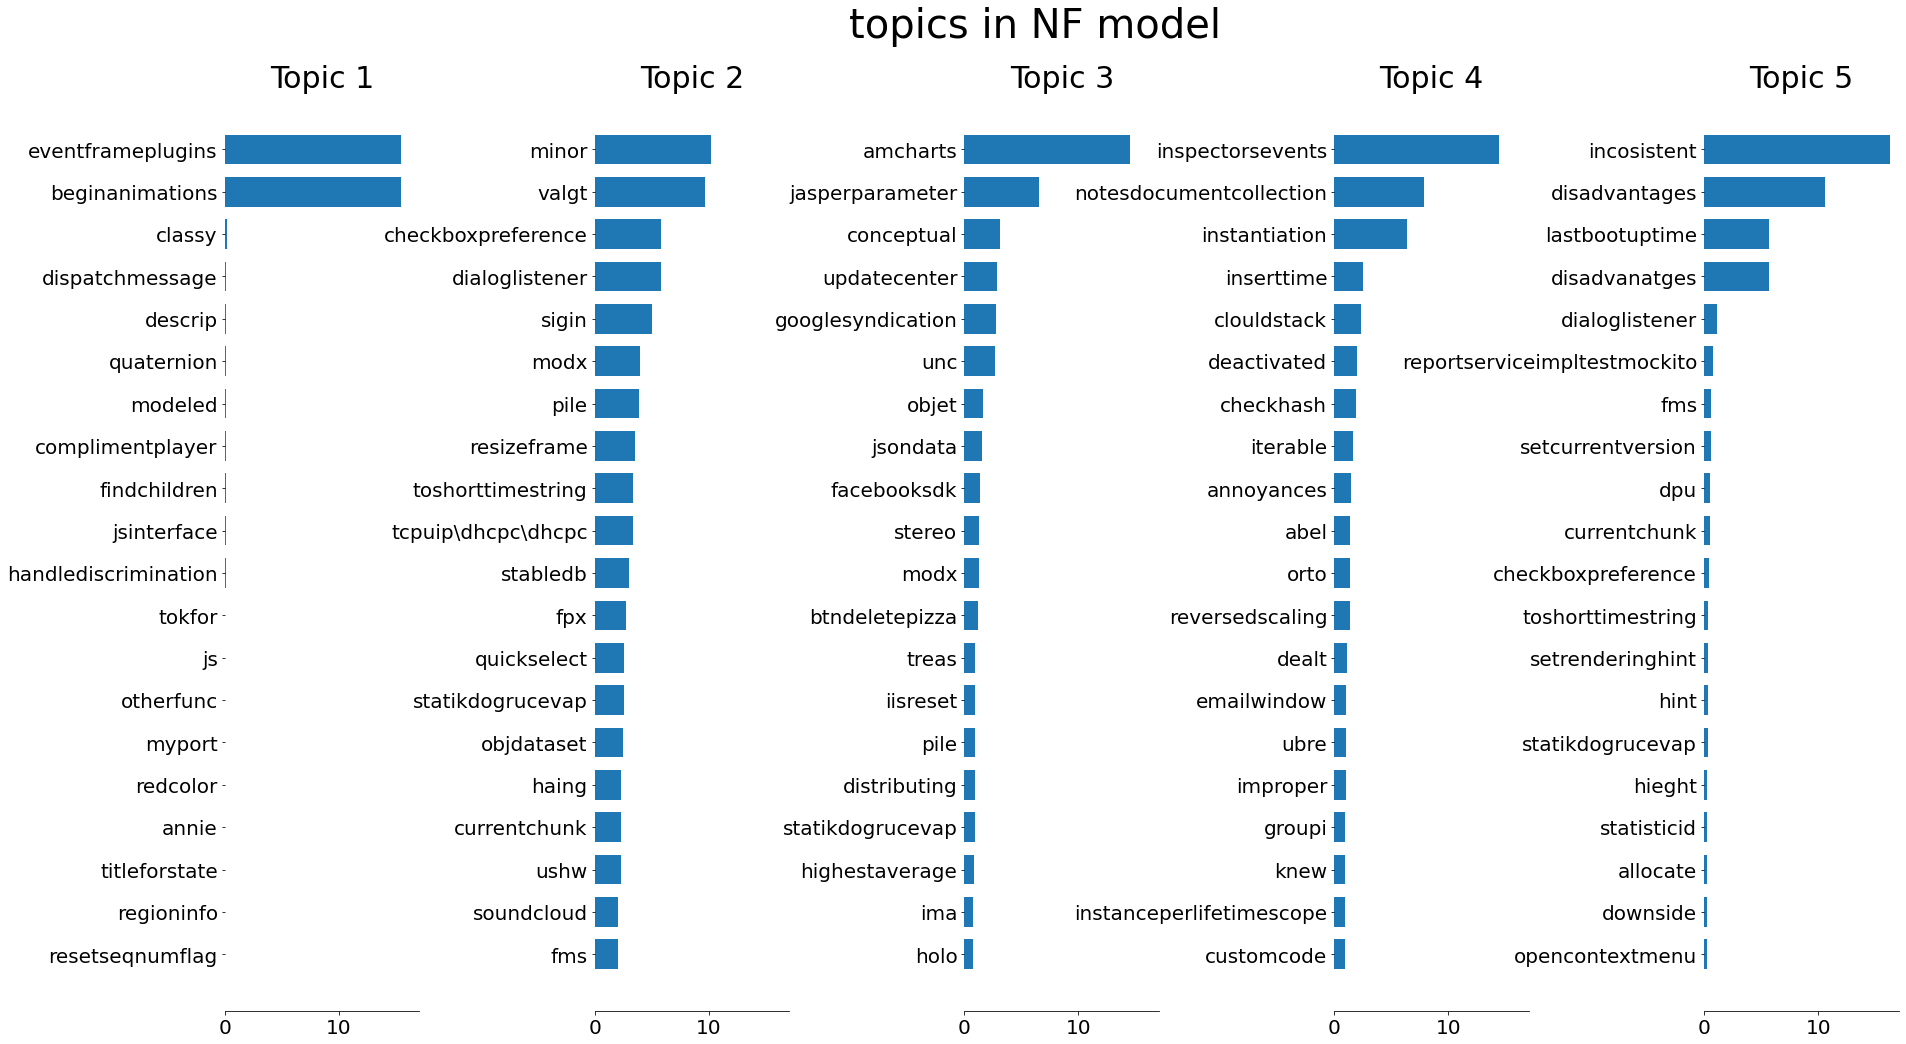

In [133]:
plot_top_words(clf, vec_feature_names, n_top_words,'topics in NF model')

In [134]:
vectorizer_tfidf = TfidfVectorizer(tokenizer = tokenize)
vectors_tfidf = vectorizer_tfidf.fit_transform(X_test.BodyMarkdown).todense() # (documents, vocab)
vectors_tfidf.shape

(10112, 47100)

In [135]:
clf = NMF(n_components=d, random_state=1)

%time W1 = clf.fit_transform(vectors_tfidf)
H1 = clf.components_

CPU times: user 6min 49s, sys: 11.2 s, total: 7min
Wall time: 3min 48s


In [136]:
n_top_words = 20
vec_feature_names_tfidf = vectorizer_tfidf.get_feature_names()

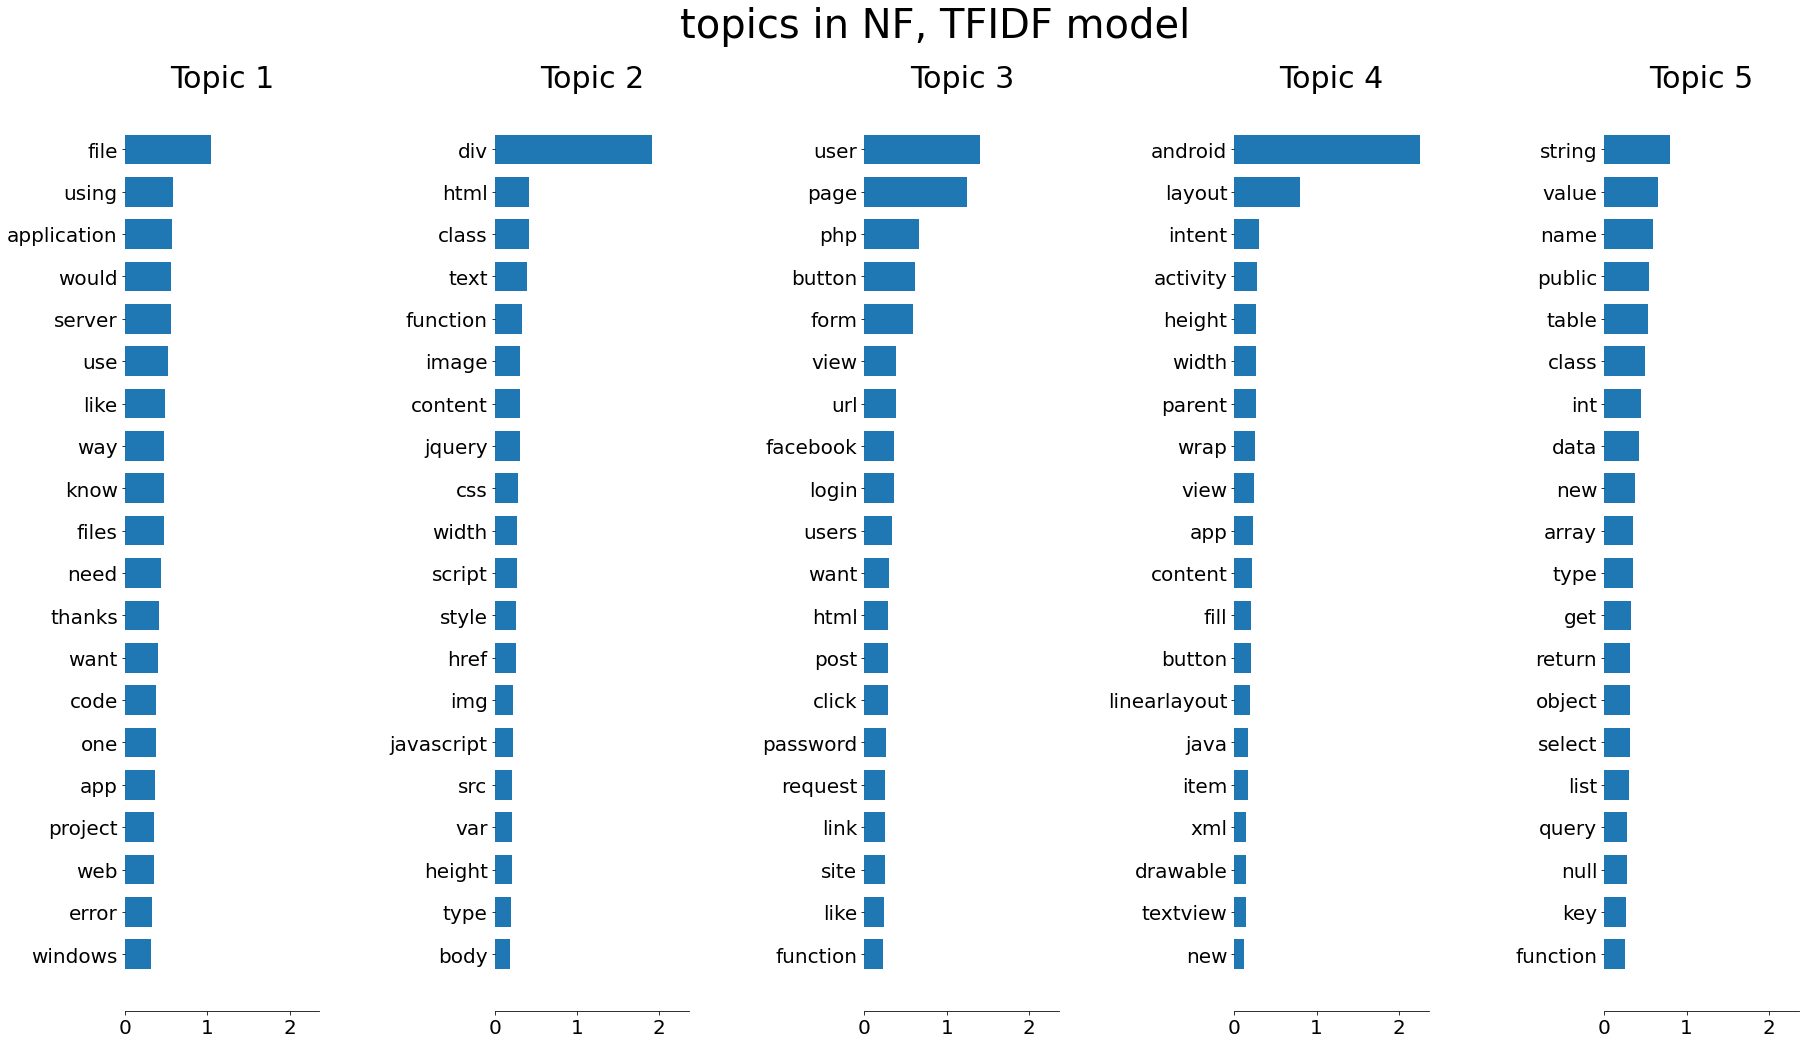

In [137]:
plot_top_words(clf, vec_feature_names_tfidf, n_top_words,'topics in NF, TFIDF model')

In [138]:
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

In [146]:
X_test.head()

,Title,BodyMarkdown,clean
1294178,Adding an external link in entity views in CRM...,"In CRM 4.0, I would like (if possible) to open...","[CRM, would, like, possible, open, external, l..."
1568857,books for numerical calcualtions in C++,> I tried to find a book. I need a good\r\n> ...,"[tried, find, book, need, good, book, numerica..."
580826,Disable WinForms ProgressBar animation,Is there a possbility to disable animation of ...,"[possbility, disable, animation, progress, bar..."
779543,Excel Macro: error when pasting - moving down ...,I'm attempting to copy data from three workboo...,"[attempting, copy, data, three, workbooks, one..."
2712849,You must finish editing the current row gridvi...,I am new to the wonderful world of asp.net gri...,"[new, wonderful, world, asp, net, gridviews, g..."


In [154]:
X_test.loc[:,'clean']=X_test.loc[:,("BodyMarkdown")].apply(tokenize)

/Users/franciumpnc/miniconda3/envs/nlp-work/lib/python3.8/site-packages/pandas/core/indexing.py:1783: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [153]:
X_test.head()

,Title,BodyMarkdown,clean
1294178,Adding an external link in entity views in CRM...,"In CRM 4.0, I would like (if possible) to open...","[CRM, would, like, possible, open, external, l..."
1568857,books for numerical calcualtions in C++,> I tried to find a book. I need a good\r\n> ...,"[tried, find, book, need, good, book, numerica..."
580826,Disable WinForms ProgressBar animation,Is there a possbility to disable animation of ...,"[possbility, disable, animation, progress, bar..."
779543,Excel Macro: error when pasting - moving down ...,I'm attempting to copy data from three workboo...,"[attempting, copy, data, three, workbooks, one..."
2712849,You must finish editing the current row gridvi...,I am new to the wonderful world of asp.net gri...,"[new, wonderful, world, asp, net, gridviews, g..."


In [160]:
data_words = X_test.clean.values.tolist()

In [162]:
data_words[:2]

[['CRM',
  'would',
  'like',
  'possible',
  'open',
  'external',
  'link',
  'directly',
  'view',
  'several',
  'entities',
  'example',
  'accounts',
  'When',
  'action',
  'taken',
  'new',
  'browser',
  'window',
  'parameterized',
  'url',
  'open',
  'external',
  'system',
  'Ideally',
  'either',
  'link',
  'record',
  'row',
  'toolbar',
  'button',
  'view',
  'action',
  'More',
  'actions',
  'list',
  'possible',
  'images',
  'would',
  'javascript',
  'somewhere',
  'sure',
  'extension',
  'point',
  'form',
  'loaded',
  'view',
  'This',
  'related',
  'associated',
  'views'],
 ['tried',
  'find',
  'book',
  'need',
  'good',
  'book',
  'numerical',
  'analysis',
  'need',
  'graduate',
  'research']]

In [164]:
"""The two main inputs to the LDA topic model are the dictionary(id2word) and the corpus.
"""
# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
for i in range(0,5):
    print(data_words[i])
    print(corpus[i])
print('------')    
print('length of vocabulary',len(id2word))

['CRM', 'would', 'like', 'possible', 'open', 'external', 'link', 'directly', 'view', 'several', 'entities', 'example', 'accounts', 'When', 'action', 'taken', 'new', 'browser', 'window', 'parameterized', 'url', 'open', 'external', 'system', 'Ideally', 'either', 'link', 'record', 'row', 'toolbar', 'button', 'view', 'action', 'More', 'actions', 'list', 'possible', 'images', 'would', 'javascript', 'somewhere', 'sure', 'extension', 'point', 'form', 'loaded', 'view', 'This', 'related', 'associated', 'views']
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 2), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 2), (17, 1), (18, 1), (19, 1), (20, 1), (21, 2), (22, 1), (23, 1), (24, 1), (25, 2), (26, 1), (27, 1), (28, 2), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 3), (40, 1), (41, 1), (42, 2)]
['tried', 'find', 'book', 'need', 'good', 'book', 'numerical', 'analysis', 'need', 'graduate', 'research']
[(43, 1

In [166]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=5, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=500,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [167]:
from pprint import pprint
# Print the Keyword in the 4 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.026*"public" + 0.025*"new" + 0.020*"int" + 0.016*"void" + 0.011*"return" '
  '+ 0.011*"class" + 0.011*"LayoutParams" + 0.010*"String" + 0.010*"private" + '
  '0.008*"self"'),
 (1,
  '0.030*"name" + 0.017*"div" + 0.016*"function" + 0.014*"value" + '
  '0.013*"type" + 0.013*"var" + 0.013*"class" + 0.012*"expiry" + 0.012*"Apr" + '
  '0.012*"cid"'),
 (2,
  '0.010*"like" + 0.009*"using" + 0.009*"The" + 0.008*"file" + 0.007*"code" + '
  '0.007*"want" + 0.007*"would" + 0.007*"use" + 0.006*"get" + 0.006*"one"'),
 (3,
  '0.038*"android" + 0.035*"java" + 0.017*"org" + 0.015*"height" + '
  '0.015*"width" + 0.012*"layout" + 0.010*"content" + 0.009*"com" + '
  '0.008*"name" + 0.007*"LinearLayout"'),
 (4,
  '0.014*"System" + 0.013*"query" + 0.012*"table" + 0.007*"Name" + '
  '0.006*"name" + 0.006*"Text" + 0.006*"SELECT" + 0.006*"SQL" + 0.006*"FROM" + '
  '0.005*"Data"')]


In [170]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

def plot_topics(lda_model):
    cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

    cloud = WordCloud(stopwords=my_stopwords,
                      background_color='white',
                      width=2500,
                      height=1800,
                      max_words=10,
                      colormap='tab10',
                      color_func=lambda *args, **kwargs: cols[i],
                      prefer_horizontal=1.0)

    topics = lda_model.show_topics(formatted=False)

    fig, axes = plt.subplots(3, 2, figsize=(10,10), sharex=True, sharey=True)

    for i, ax in enumerate(axes.flatten()):
        fig.add_subplot(ax)
        topic_words = dict(topics[i][1])
        cloud.generate_from_frequencies(topic_words, max_font_size=300)
        plt.gca().imshow(cloud)
        plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
        plt.gca().axis('off')


    plt.subplots_adjust(wspace=0, hspace=0)
    plt.axis('off')
    plt.margins(x=0, y=0)
    plt.tight_layout()
    plt.show()

IndexError: list index out of range

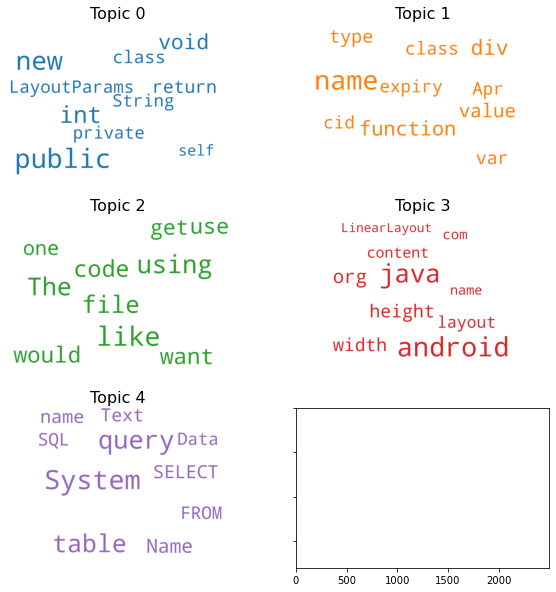

In [171]:
plot_topics(lda_model)